In [1]:
import sys, os

src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.append(src_path)


In [2]:
from data_loading import load_raw_series, train_val_split
from metrics import mae, mape, rmse
from models import naive_forecast, moving_average_forecast

import matplotlib.pyplot as plt
import pandas as pd

series = load_raw_series("aapl.csv", value_col="Close")
train, val = train_val_split(series, val_fraction=0.2)

len(train), len(val), train.index.min(), train.index.max(), val.index.min(), val.index.max()


(1595,
 399,
 Timestamp('2018-01-02 00:00:00'),
 Timestamp('2024-05-03 00:00:00'),
 Timestamp('2024-05-06 00:00:00'),
 Timestamp('2025-12-05 00:00:00'))

In [3]:
# Forecasts
naive_pred = naive_forecast(train, val)
ma30_pred = moving_average_forecast(train, val, window=30)

# Metrics
results = {
    "model": ["naive", "ma_30"],
    "MAE": [mae(val, naive_pred), mae(val, ma30_pred)],
    "MAPE": [mape(val, naive_pred), mape(val, ma30_pred)],
    "RMSE": [rmse(val, naive_pred), rmse(val, ma30_pred)],
}

metrics_df = pd.DataFrame(results)
metrics_df


,model,MAE,MAPE,RMSE
0,naive,2.649913,1.198650,3.911512
1,ma_30,9.116037,4.086461,11.277069


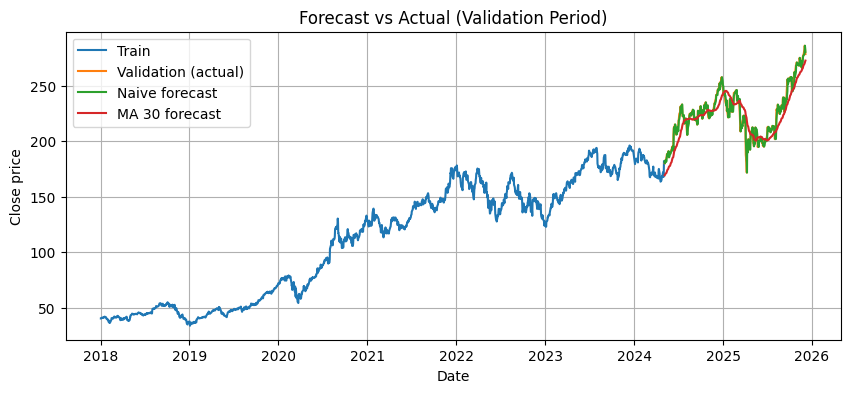

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label="Train")
plt.plot(val.index, val, label="Validation (actual)")
plt.plot(val.index, naive_pred, label="Naive forecast")
plt.plot(val.index, ma30_pred, label="MA 30 forecast")
plt.title("Forecast vs Actual (Validation Period)")
plt.xlabel("Date")
plt.ylabel("Close price")
plt.grid(True)
plt.legend()
plt.show()
